In [1]:
import torch
import os
from IPython.display import Image

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master

                 from  n    params  module                                  arguments                     
  0                -1  1      7040  models.common.Focus                     [3, 64, 3]                    
  1                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  2                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  3                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  4                -1  1   1611264  models.common.C3                        [256, 256, 9]                 
  5                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  6                -1  1   6433792  models.common.C3                        [512, 512, 9]                 
  7                -1  1   4720640  models.common.Conv                   

Adding autoShape... 


In [3]:
imgs = ['./teddy_bear.jpg', './phone.jpg']
results = model(imgs)

# Results
results.print()

image 1/2: 768x1024 1 bed, 1 teddy bear
image 2/2: 533x800 1 laptop, 2 cell phones
Speed: 43.7ms pre-process, 3733.4ms inference, 2.9ms NMS per image at shape (2, 3, 480, 640)


Saving results/teddy_bear.jpg, results/phone.jpg, done.


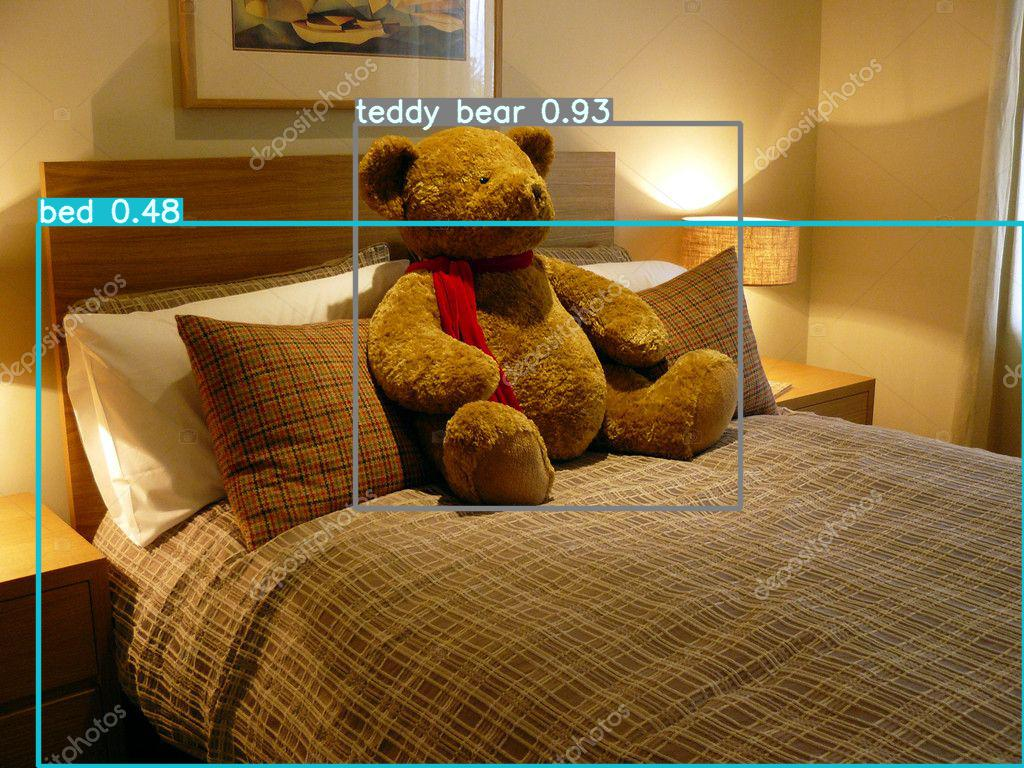

In [4]:
results.save()
Image('results/teddy_bear.jpg')

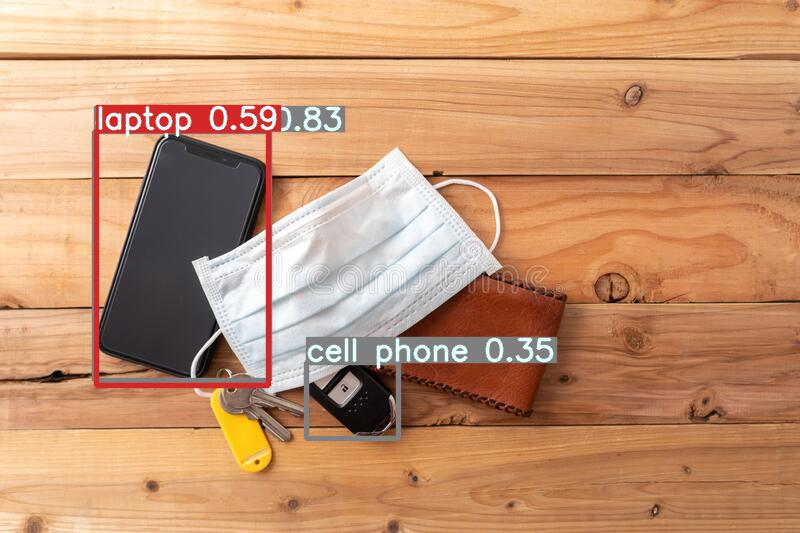

In [5]:
Image('results/phone.jpg')

In [6]:
names = model.module.names if hasattr(model, 'module') else model.names
# print(names)

for im_res in results.xyxy[1]:
    class_id = int(im_res[5].item())
    confidence = im_res[4].item()
    print('class:', names[class_id], 'confidence:', confidence)

class: cell phone confidence: 0.8349488377571106
class: laptop confidence: 0.5918813347816467
class: cell phone confidence: 0.35124123096466064


# Test with crop

In [7]:
from PIL import Image as pilimage

In [8]:
img = pilimage.open('./phone.jpg')

In [9]:
left = 0
top = 50
right = 510
bottom = 292
 
img_res = img.crop((left, top, right, bottom)) 

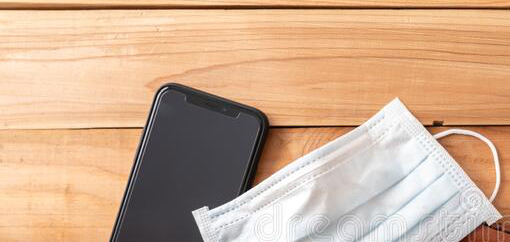

In [10]:
img_res

In [11]:
img_res.save('/tmp/phone_resize.jpg')

Saving results/phone_resize.jpg, done.


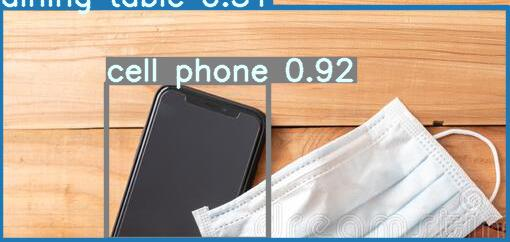

In [12]:
imgs = ['/tmp/phone_resize.jpg']
results = model(imgs)
results.save()
Image('results/phone_resize.jpg')

In [13]:
for im_res in results.xyxy[0]:
    class_id = int(im_res[5].item())
    confidence = im_res[4].item()
    print('class:', names[class_id], 'confidence:', confidence)

class: cell phone confidence: 0.922241747379303
class: dining table confidence: 0.5110369324684143


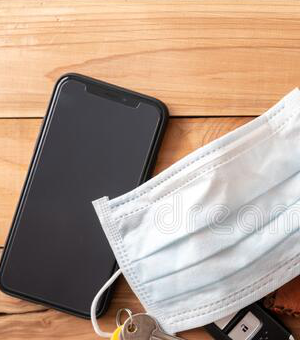

In [14]:
img = pilimage.open('./phone.jpg')
img_res2 = img.crop((100, 60, 400, 400)) 
img_res2

Saving results/phone_resize2.jpg, done.


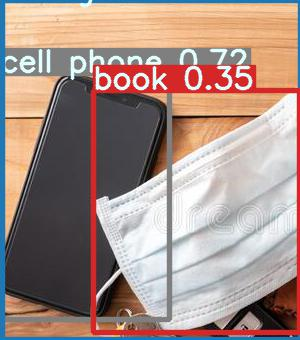

In [15]:
base_name = 'phone_resize2.jpg'
file_path = f'/tmp/{base_name}'
img_res2.save(file_path)
imgs = [file_path]
results = model(imgs)
results.save()
Image(f'results/{base_name}')

In [16]:
for im_res in results.xyxy[0]:
    class_id = int(im_res[5].item())
    confidence = im_res[4].item()
    print('class:', names[class_id], 'confidence:', confidence)

class: cell phone confidence: 0.7247585654258728
class: dining table confidence: 0.43377622961997986
class: book confidence: 0.34807059168815613


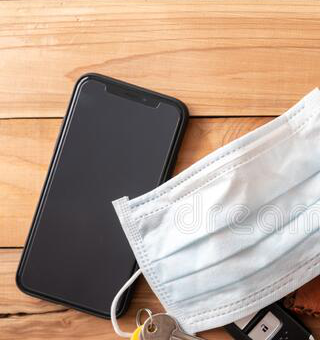

In [17]:
img = pilimage.open('./phone.jpg')
img_res2 = img.crop((80, 60, 400, 400)) 
img_res2

Saving results/phone_resize2.jpg, done.


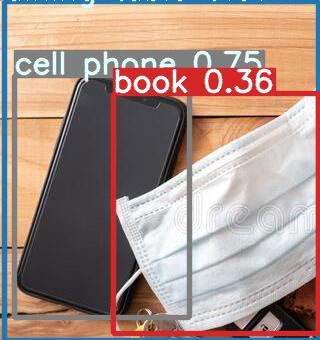

In [18]:
base_name = 'phone_resize2.jpg'
file_path = f'/tmp/{base_name}'
img_res2.save(file_path)
imgs = [file_path]
results = model(imgs)
results.save()
Image(f'results/{base_name}')

In [19]:
for im_res in results.xyxy[0]:
    class_id = int(im_res[5].item())
    confidence = im_res[4].item()
    print('class:', names[class_id], 'confidence:', confidence)

class: cell phone confidence: 0.7518619298934937
class: dining table confidence: 0.36674708127975464
class: book confidence: 0.36103555560112


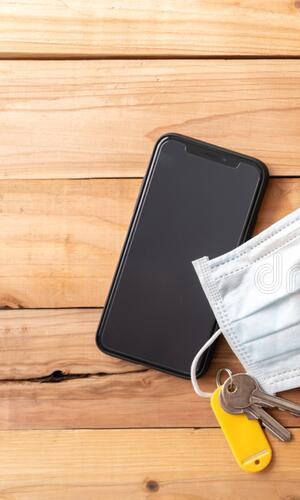

In [20]:
img = pilimage.open('./phone.jpg')
img_res2 = img.crop((0, 0, 300, 500)) 
img_res2

Saving results/phone_resize2.jpg, done.


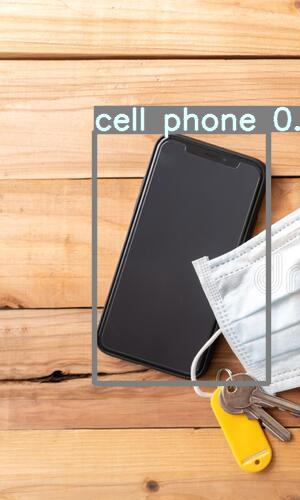

In [21]:
base_name = 'phone_resize2.jpg'
file_path = f'/tmp/{base_name}'
img_res2.save(file_path)
imgs = [file_path]
results = model(imgs)
results.save()
Image(f'results/{base_name}')

In [22]:
for im_res in results.xyxy[0]:
    class_id = int(im_res[5].item())
    confidence = im_res[4].item()
    print('class:', names[class_id], 'confidence:', confidence)

class: cell phone confidence: 0.8590160608291626
